In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.cuda.is_available()

False

In [2]:
torch.__version__

'2.0.1'

In [3]:
arr1 = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
arr2 = arr1.T

print(arr1)
print(arr2)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])


In [4]:
print(arr1+arr2)
print(arr1*arr2)
print(arr1 @ arr2)

tensor([[ 2,  6, 10],
        [ 6, 10, 14],
        [10, 14, 18]])
tensor([[ 1,  8, 21],
        [ 8, 25, 48],
        [21, 48, 81]])
tensor([[ 14,  32,  50],
        [ 32,  77, 122],
        [ 50, 122, 194]])


In [5]:
arr3 = torch.stack([arr1, arr2])
print(arr3.shape)
print(arr3)

torch.Size([2, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 4, 7],
         [2, 5, 8],
         [3, 6, 9]]])


In [6]:
arr4 = arr3.reshape(-1,6)
print(arr4.shape)
print(arr4)

torch.Size([3, 6])
tensor([[1, 2, 3, 4, 5, 6],
        [7, 8, 9, 1, 4, 7],
        [2, 5, 8, 3, 6, 9]])


x,y range: (120,) (120,)
X Y maps: (120, 120) (120, 120)


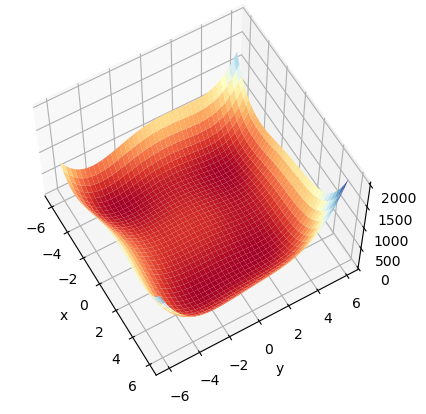

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

x=np.arange(-6,6,0.1)
y=np.arange(-6,6,0.1)
print('x,y range:',x.shape,y.shape)
X,Y=np.meshgrid(x,y)
print('X Y maps:',X.shape,Y.shape)
Z=himmelblau([X,Y])

fig=plt.figure('himmelblau')
ax=fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,Z,cmap='RdYlBu')
ax.view_init(60,-30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [8]:
x = torch.tensor([0., 0.], requires_grad=True)
optimizer = torch.optim.SGD([x], lr=1e-3)
for step in range(20000):
    pred = himmelblau(x)  # 得到预测值
    optimizer.zero_grad()  # 梯度清零
    pred.backward()  # 计算梯度大小，记录在参数的属性里
    optimizer.step()  # 根据之前定义的优化器更新梯度大小

    if step % 2000 == 0:
        print('step {}: x={}, f(x)={}'
              .format(step, x.tolist(), pred.item()))

step 0: x=[0.014000000432133675, 0.02200000174343586], f(x)=170.0
step 2000: x=[2.999997138977051, 2.000005006790161], f(x)=4.483808879740536e-10
step 4000: x=[2.999997138977051, 2.000005006790161], f(x)=4.483808879740536e-10
step 6000: x=[2.999997138977051, 2.000005006790161], f(x)=4.483808879740536e-10
step 8000: x=[2.999997138977051, 2.000005006790161], f(x)=4.483808879740536e-10
step 10000: x=[2.999997138977051, 2.000005006790161], f(x)=4.483808879740536e-10
step 12000: x=[2.999997138977051, 2.000005006790161], f(x)=4.483808879740536e-10
step 14000: x=[2.999997138977051, 2.000005006790161], f(x)=4.483808879740536e-10
step 16000: x=[2.999997138977051, 2.000005006790161], f(x)=4.483808879740536e-10
step 18000: x=[2.999997138977051, 2.000005006790161], f(x)=4.483808879740536e-10


In [9]:
x_ = torch.tensor([0., 0.], requires_grad=True)

In [10]:
pred = himmelblau(x_)  # 得到预测值
pred.backward()
x_.grad

tensor([-14., -22.])